In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf
from sklearn.decomposition import PCA


In [3]:
# Loading a CSV file into a DataFrame
df_void = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')
df_void_new = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_parts_new = pd.read_csv('../Processed dataset/df_new_parts.csv')

#df_parts.head(10)
df_parts_new.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids,Num_Wpixels,Num_Bpixels,Wpixels_ratio
0,img01.bmp,top_left,part,0,38291,4105.674,0.153,-1.268,0.760,0.743,277.925,274.667,220.802,0,41,38291,13692,0.736606
1,img01.bmp,bottom_left,part,0,37887,4155.306,0.157,-1.304,0.752,0.735,279.026,275.584,219.634,1,42,37887,14096,0.728834
2,img01.bmp,top_right,part,0,37334,4106.076,0.189,1.564,0.752,0.734,277.777,272.791,218.026,2,46,37334,14194,0.724538
3,img01.bmp,bottom_right,part,0,37868,4139.319,0.164,-1.070,0.756,0.738,277.900,274.158,219.579,3,45,37868,13661,0.734887
4,img02.bmp,top_left,part,0,36599,4223.005,0.118,-0.817,0.730,0.713,280.140,278.182,215.869,4,41,36599,15385,0.704044
5,img02.bmp,bottom_left,part,0,36382,4305.088,0.104,-0.787,0.722,0.706,280.715,279.187,215.228,5,42,36382,15602,0.699869
6,img02.bmp,top_right,part,0,36808,4366.544,0.067,-1.190,0.737,0.721,278.233,277.617,216.484,6,47,36808,14721,0.714316
7,img02.bmp,bottom_right,part,0,36903,4180.034,0.127,-0.903,0.738,0.723,279.169,276.892,216.763,7,43,36903,15081,0.709892
8,img03.bmp,top_left,part,0,37697,4124.720,0.123,-1.276,0.753,0.735,277.368,275.259,219.083,8,43,37697,14059,0.728360
9,img03.bmp,bottom_left,part,0,37626,4153.833,0.117,-0.853,0.751,0.733,277.820,275.897,218.876,9,43,37626,14130,0.726988


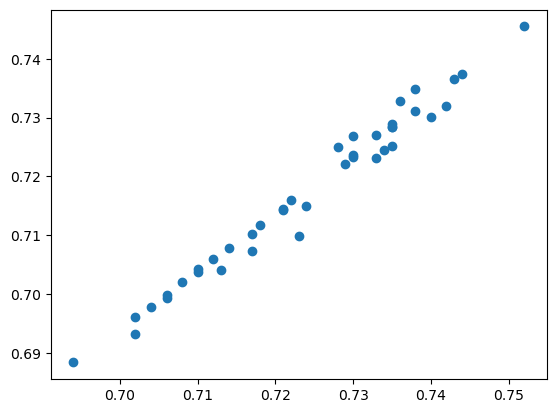

In [11]:
plt.plot(df_parts_new['Extent'], df_parts_new['Wpixels_ratio'], 'o')

In [4]:
# normality test for df parts new
start_index = 4

end_index = len(df_parts_new.columns) 

for col in df_parts_new.columns[start_index:end_index]:
    dataset = df_parts_new.loc[:, col].values 

    
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))


p-value of the Shapiro-Wilk test for "Area [pixels]": 0.731
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.869
p-value of the Shapiro-Wilk test for "Eccentricity": 0.097
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.000
p-value of the Shapiro-Wilk test for "Solidity": 0.267
p-value of the Shapiro-Wilk test for "Extent": 0.369
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.097
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.317
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.704
p-value of the Shapiro-Wilk test for "Part_ID": 0.124
p-value of the Shapiro-Wilk test for "Num_voids": 0.002
p-value of the Shapiro-Wilk test for "Num_Wpixels": 0.731
p-value of the Shapiro-Wilk test for "Num_Bpixels": 0.124
p-value of the Shapiro-Wilk test for "Wpixels_ratio": 0.351


In [4]:
# Not normal
data_part_norm = df_parts_new.drop(columns=['Orientation [radians]','Num_voids','Num_Wpixels'])  # remove also Num_Wpixels, same info of Area


In [8]:
data_part_norm.corr()

,ID,Area [pixels],Perimeter [pixels],Eccentricity,Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_Bpixels,Wpixels_ratio
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area [pixels],NaN,1.000000,-0.868500,0.487220,0.959698,0.958566,-0.405992,-0.642584,0.999978,-0.050911,-0.895196,0.948576
Perimeter [pixels],NaN,-0.868500,1.000000,-0.550430,-0.864030,-0.867636,0.358189,0.631061,-0.868537,0.071771,0.782083,-0.826997
Eccentricity,NaN,0.487220,-0.550430,1.000000,0.458303,0.460953,0.107364,-0.525895,0.486802,-0.124913,-0.387367,0.427530
Solidity,NaN,0.959698,-0.864030,0.458303,1.000000,0.997646,-0.620355,-0.809900,0.959639,-0.103737,-0.972322,0.990632
Extent,NaN,0.958566,-0.867636,0.460953,0.997646,1.000000,-0.608374,-0.800234,0.958493,-0.096992,-0.970541,0.988958
Major Axis Length [pixels],NaN,-0.405992,0.358189,0.107364,-0.620355,-0.608374,1.000000,0.776953,-0.406034,0.167171,0.721335,-0.639180
Minor Axis Length [pixels],NaN,-0.642584,0.631061,-0.525895,-0.809900,-0.800234,0.776953,1.000000,-0.642224,0.246827,0.849243,-0.803835
Equivalent Diameter [pixels],NaN,0.999978,-0.868537,0.486802,0.959639,0.958493,-0.406034,-0.642224,1.000000,-0.051100,-0.895069,0.948515
Part_ID,NaN,-0.050911,0.071771,-0.124913,-0.103737,-0.096992,0.167171,0.246827,-0.051100,1.000000,0.098758,-0.086510


In [5]:
data_part_norm = data_part_norm.drop(columns=['Solidity','Extent' ,'Num_Bpixels', 'ID'])  # remove also Num_Wpixels, same info of Area


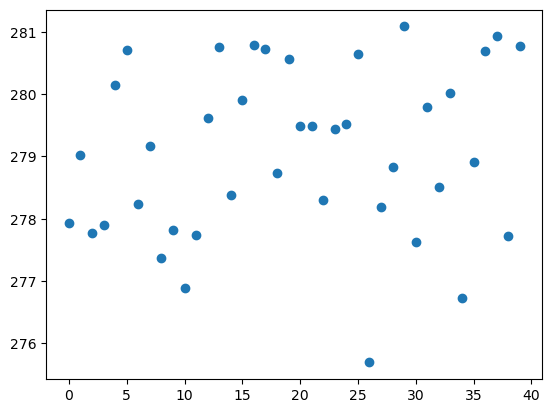

In [15]:
plt.plot(df_parts_new['Part_ID'], df_parts_new['Major Axis Length [pixels]'], 'o')

In [6]:
data_part_norm = data_part_norm.drop(columns=['Equivalent Diameter [pixels]'])  # remove also Num_Wpixels, same info of Area


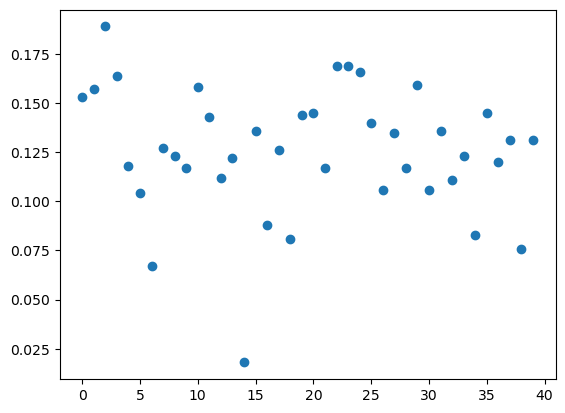

In [25]:
plt.plot(df_parts_new['Part_ID'], df_parts_new['Eccentricity'], 'o')

In [33]:
data_part_norm.head(10)

,Image name,Position,Region type,Area [pixels],Perimeter [pixels],Eccentricity,Major Axis Length [pixels],Minor Axis Length [pixels],Part_ID,Wpixels_ratio
0,img01.bmp,top_left,part,38291,4105.674,0.153,277.925,274.667,0,0.736606
1,img01.bmp,bottom_left,part,37887,4155.306,0.157,279.026,275.584,1,0.728834
2,img01.bmp,top_right,part,37334,4106.076,0.189,277.777,272.791,2,0.724538
3,img01.bmp,bottom_right,part,37868,4139.319,0.164,277.900,274.158,3,0.734887
4,img02.bmp,top_left,part,36599,4223.005,0.118,280.140,278.182,4,0.704044
5,img02.bmp,bottom_left,part,36382,4305.088,0.104,280.715,279.187,5,0.699869
6,img02.bmp,top_right,part,36808,4366.544,0.067,278.233,277.617,6,0.714316
7,img02.bmp,bottom_right,part,36903,4180.034,0.127,279.169,276.892,7,0.709892
8,img03.bmp,top_left,part,37697,4124.720,0.123,277.368,275.259,8,0.728360
9,img03.bmp,bottom_left,part,37626,4153.833,0.117,277.820,275.897,9,0.726988


In [7]:
dataNum = data_part_norm.select_dtypes(include=np.number)
dataset=dataNum.drop(columns=['Part_ID'])  # remove also Num_Wpixels, same info of Area
dataset.head(10)

,Area [pixels],Perimeter [pixels],Eccentricity,Major Axis Length [pixels],Minor Axis Length [pixels],Wpixels_ratio
0,38291,4105.674,0.153,277.925,274.667,0.736606
1,37887,4155.306,0.157,279.026,275.584,0.728834
2,37334,4106.076,0.189,277.777,272.791,0.724538
3,37868,4139.319,0.164,277.900,274.158,0.734887
4,36599,4223.005,0.118,280.140,278.182,0.704044
5,36382,4305.088,0.104,280.715,279.187,0.699869
6,36808,4366.544,0.067,278.233,277.617,0.714316
7,36903,4180.034,0.127,279.169,276.892,0.709892
8,37697,4124.720,0.123,277.368,275.259,0.728360
9,37626,4153.833,0.117,277.820,275.897,0.726988


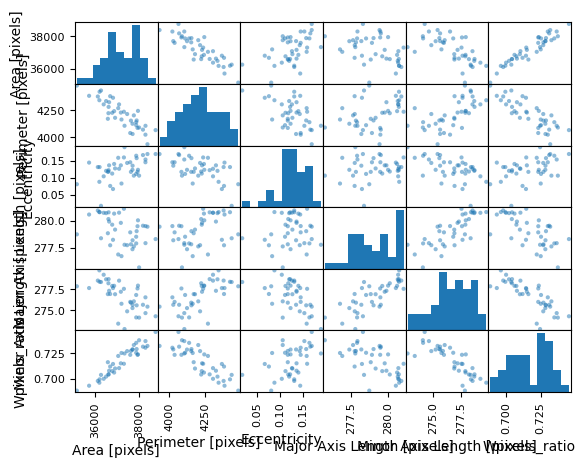

In [8]:
#Scatter plot
pd.plotting.scatter_matrix(dataset)
plt.show()

# can see some linear correlated vars and some very sparse/uncorrelated

In [9]:
# Correlation matrix
cov_matrix = dataset.cov()
#print(cov_matrix)

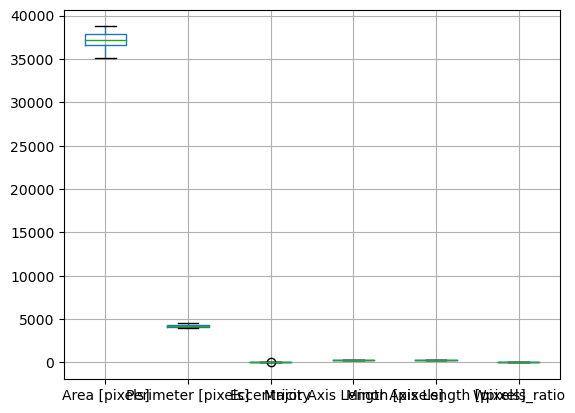

In [10]:
#Boxplot
dataset.boxplot()
plt.show() 
# need to scale vars

In [11]:
# Standardize the data
data_std = (dataset - dataset.mean()) / dataset.std()
data_std.head(10)

,Area [pixels],Perimeter [pixels],Eccentricity,Major Axis Length [pixels],Minor Axis Length [pixels],Wpixels_ratio
0,1.374602,-0.839314,0.834630,-0.835879,-1.221151,1.381585
1,0.873789,-0.456789,0.957370,-0.028135,-0.670558,0.828088
2,0.188270,-0.836215,1.939288,-0.944459,-2.347555,0.522110
3,0.850236,-0.580004,1.172164,-0.854220,-1.526769,1.259156
4,-0.722863,0.064983,-0.239342,0.789146,0.889354,-0.937490
5,-0.991864,0.697615,-0.668932,1.210992,1.492785,-1.234783
6,-0.463779,1.171270,-1.804274,-0.609916,0.550112,-0.205883
7,-0.346014,-0.266204,0.036822,0.076776,0.114802,-0.521005
8,0.638258,-0.692522,-0.085918,-1.244520,-0.865698,0.794300
9,0.550244,-0.468141,-0.270027,-0.912912,-0.482624,0.696600


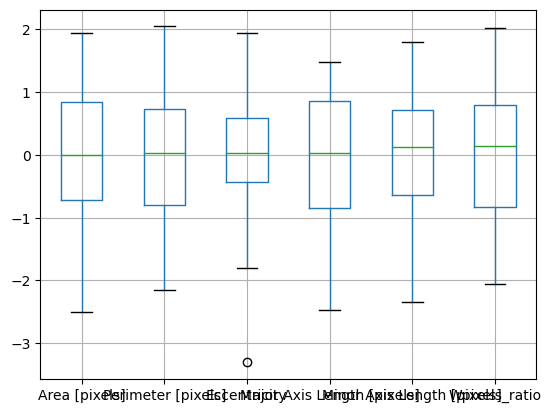

In [12]:
#cov matrix
cov_matrix_std = data_std.cov()

#Boxplot
data_std.boxplot()
plt.show() 

In [13]:
# Create the PCA object
pca = PCA()
# Fit the PCA object to the data
pca.fit(data_std)

#print("Eigenvalues \n", pca.explained_variance_)
#print("\nEigenvectors \n", pca.components_)
#print("\nExplained variance ratio \n", pca.explained_variance_ratio_)

print("\nCumulative explained variance ratio \n", np.cumsum(pca.explained_variance_ratio_))



Cumulative explained variance ratio 
 [0.67590644 0.87491069 0.97001165 0.99673013 0.99860071 1.        ]


In [14]:
# Compute the scores (i.e. all the principal components, n x 3) 
scores = pca.transform(data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores)
# Print the first rows of the scores dataframe
scores_df.head()

,0,1,2,3,4,5
0,-2.689999,0.011667,0.083255,0.378495,-0.028809,-0.044899
1,-1.568524,-0.623291,0.168152,0.383475,-0.002288,0.028256
2,-2.581500,-0.316555,2.043866,-0.410732,-0.221245,0.108483
3,-2.516162,-0.018588,0.786891,0.331527,0.084378,0.108729
4,1.513406,-0.520160,-0.217246,-0.516617,-0.005043,-0.039359


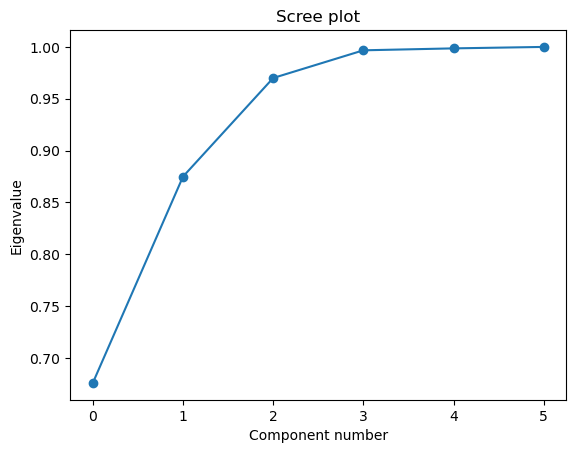

In [15]:
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

# keeping 4 or 5 pcs should be enough (more than 95% variability explained)

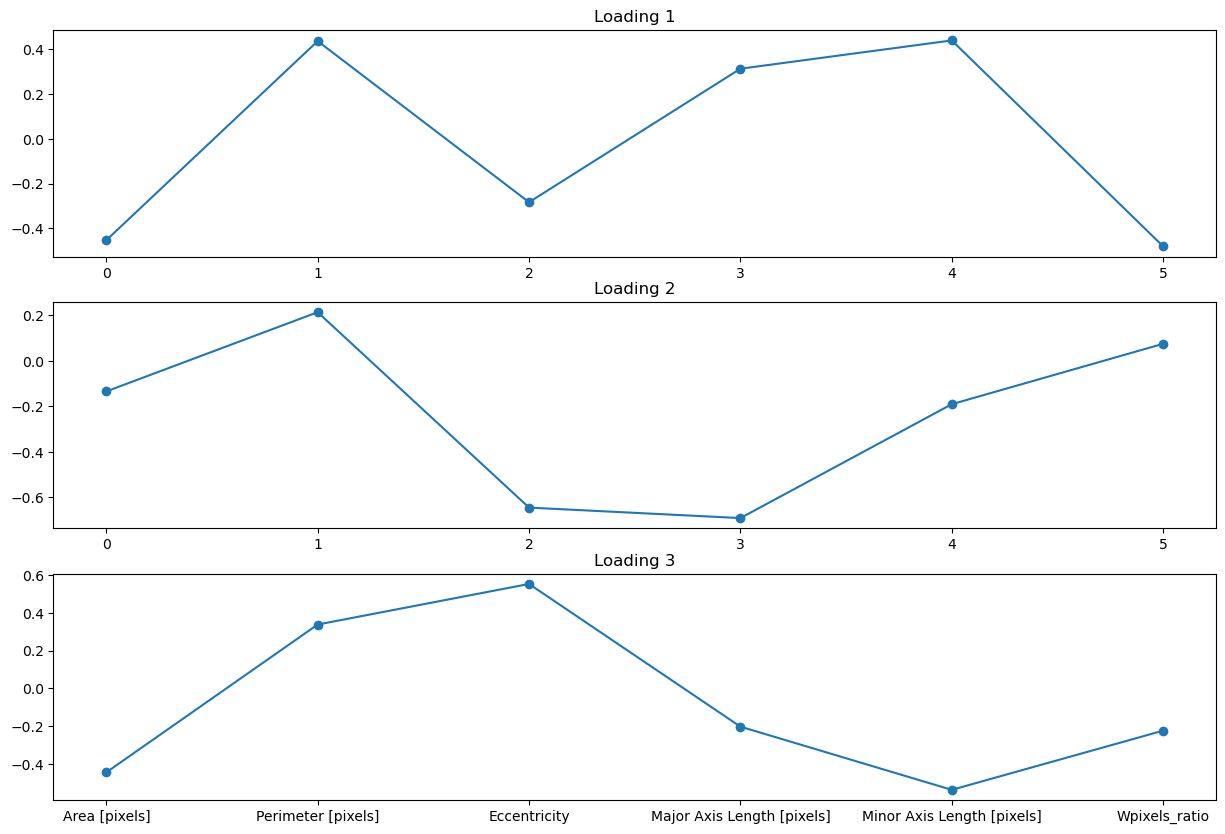

In [21]:
# Loadings
# Plot only the first k PCs
k = 3
fig, ax = plt.subplots(k,1, figsize = (15, 10))
for i in range(k):
   ax[i].plot(pca.components_[i], 'o-')
   ax[i].set_title('Loading ' + str(i+1))
   plt.xticks(ticks=np.arange(0, 6, step=1), labels=dataset.columns)


In [22]:
# PCs normality
for col in scores_df.columns:
    dataset = scores_df.loc[:, col].values
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

#some normal, some not
#we interested in 0 to 4, but "1" and "2" not normal 


p-value of the Shapiro-Wilk test for "0": 0.069
p-value of the Shapiro-Wilk test for "1": 0.008
p-value of the Shapiro-Wilk test for "2": 0.007
p-value of the Shapiro-Wilk test for "3": 0.310
p-value of the Shapiro-Wilk test for "4": 0.001
p-value of the Shapiro-Wilk test for "5": 0.010


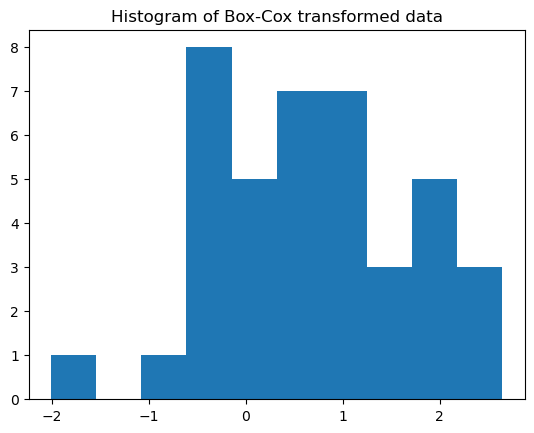

p-value of the Shapiro-Wilk test for "transf_1": 0.578


In [ ]:
# Box-Cox 
dat = scores_df.loc[:, 1].values
dat=dat+np.abs(dat.min())+0.001
[transf_1, lmbda] = stats.boxcox(dat) 
# If lmbda is None (default), find the value of lmbda that maximizes the log-likelihood function and return it as the second output argument.

plt.hist(transf_1)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

col = 'transf_1'
_, p_value_SW = stats.shapiro(transf_1)
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

# normal